In [31]:
import pandas as pd
from datetime import date

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:20,.20f}'.format)

df = pd.read_excel('Dummy_Daten.xls')

df.head(5)

,Datum,Wert,Last
0,2020-01-01 00:00:00,31.35753559931796985438,9.99465939694657024006
1,2020-01-01 01:00:00,7.78930374414994819432,62.30245746302915677006
2,2020-01-01 02:00:00,27.37144872592561739566,72.08143948521755817183
3,2020-01-01 03:00:00,5.27384078116675159009,88.71037014756416283490
4,2020-01-01 04:00:00,22.16878248859079292288,47.51181821796791382440


Falsches Datum am short-day (Zeitumstellung im März) - Zeile eliminieren
Sicherstellung korrekter Umgang mit long-day (Zeitumstellung im Oktober)
ggf. suchen nach #WERT etc. (in dieser Mappe nicht vorhanden)
Alle Stunden, die Montag-Freitag 8-20 Uhr liegen, Mitteln und 95% Quantil
Mittelwert alle Montage im Offpeak Cal 21- Cal 22 durch neuen Mittelwert (z.B. 20)
Skalarprodukt für alle Dienstage 20-24 Uhr bilden und auf die entsprechende Last spezifizieren
[[2, 3], [2, 3]]
[[2, 3], [2, 3]]


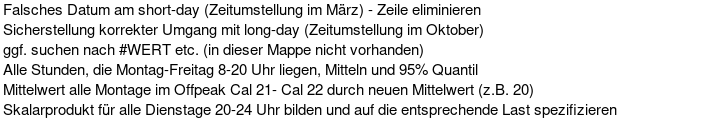

In [5]:
df[(df['Datum'] > '2020-03-29') & (df['Datum'] < '2020-03-30')]

,Datum,Wert,Last
2113,2020-03-29 01:00:00,3.229706,17.836806
2114,2020-03-29 02:00:00,NaN,79.210619
2115,2020-03-29 03:00:00,5.586788,41.271838
2116,2020-03-29 04:00:00,1.342633,58.293550
2117,2020-03-29 05:00:00,0.210800,7.103175
2118,2020-03-29 06:00:00,0.075417,35.139434
2119,2020-03-29 07:00:00,0.886306,73.256812
2120,2020-03-29 08:00:00,0.243495,51.213495
2121,2020-03-29 09:00:00,2.608656,86.227514
2122,2020-03-29 10:00:00,-0.015650,47.895355


In [12]:
# df = df.drop(2114)
# df.drop('2020-03-29 02:00:00')
df[(df['Datum'] > '2020-03-29') & (df['Datum'] < '2020-03-30')]

,Datum,Wert,Last
2113,2020-03-29 01:00:00,3.229706,17.836806
2115,2020-03-29 03:00:00,5.586788,41.271838
2116,2020-03-29 04:00:00,1.342633,58.293550
2117,2020-03-29 05:00:00,0.210800,7.103175
2118,2020-03-29 06:00:00,0.075417,35.139434
2119,2020-03-29 07:00:00,0.886306,73.256812
2120,2020-03-29 08:00:00,0.243495,51.213495
2121,2020-03-29 09:00:00,2.608656,86.227514
2122,2020-03-29 10:00:00,-0.015650,47.895355
2123,2020-03-29 11:00:00,-0.022335,47.291674


In [14]:
df['Wert'].isnull().values.any()

True

In [15]:
nan_rows = df[df['Wert'].isnull()]
nan_rows

,Datum,Wert,Last
2114,2020-03-29 02:00:00,NaN,79.210619
10851,2021-03-28 02:00:00,NaN,17.041387
19588,2022-03-27 02:00:00,NaN,63.538714


In [20]:
df[df['Wert'].isnull()]

,Datum,Wert,Last
2114,2020-03-29 02:00:00,NaN,79.210619
10851,2021-03-28 02:00:00,NaN,17.041387
19588,2022-03-27 02:00:00,NaN,63.538714


In [21]:
df['Wert']

0        31.357536
1         7.789304
2        27.371449
3         5.273841
4        22.168782
           ...    
26302    37.066888
26303    30.389628
26304    28.563663
26305    23.318044
26306    14.479349
Name: Wert, Length: 26307, dtype: float64

In [22]:
df[(df['Datum'] > '2020-10-25') & (df['Datum'] < '2020-10-26')]

,Datum,Wert,Last
7153,2020-10-25 01:00:00,0.006219,13.675891
7154,2020-10-25 02:00:00,0.005901,98.243302
7155,2020-10-25 02:00:00,0.043364,93.282380
7156,2020-10-25 03:00:00,-0.015054,81.425014
7157,2020-10-25 04:00:00,-5.893556,82.176615
7158,2020-10-25 05:00:00,-0.206893,71.143969
7159,2020-10-25 06:00:00,-2.242997,63.005915
7160,2020-10-25 07:00:00,-0.982881,56.900692
7161,2020-10-25 08:00:00,0.016011,79.952234
7162,2020-10-25 09:00:00,-0.008642,5.099036


In [23]:
df[df['Datum'].duplicated()]

,Datum,Wert,Last
7155,2020-10-25 02:00:00,0.043364,93.282380
16060,2021-10-31 02:00:00,7.812505,70.695774
24797,2022-10-30 02:00:00,5.180477,19.068032


In [27]:
df.head(5)

,Datum,Wert,Last
0,2020-01-01 00:00:00,31.35753559931796985438,9.99465939694657024006
1,2020-01-01 01:00:00,7.78930374414994819432,62.30245746302915677006
2,2020-01-01 02:00:00,27.37144872592561739566,72.08143948521755817183
3,2020-01-01 03:00:00,5.27384078116675159009,88.71037014756416283490
4,2020-01-01 04:00:00,22.16878248859079292288,47.51181821796791382440


In [35]:
df[df['Wert'] == 31.35753559931796985438]

,Datum,Wert,Last
0,2020-01-01,31.35753559931796985438,9.99465939694657024006


In [33]:
df.query('Last == 9.99465939694657024006')

,Datum,Wert,Last
0,2020-01-01,31.35753559931796985438,9.99465939694657024006


In [34]:
df.query('Wert == 31.35753559931796985438')

,Datum,Wert,Last
0,2020-01-01,31.35753559931796985438,9.99465939694657024006


In [40]:
df['gerundet'] = df['Wert'].round(4)
df.head(5)

,Datum,Wert,Last,gerundet
0,2020-01-01 00:00:00,31.35753559931796985438,9.99465939694657024006,31.35750000000000170530
1,2020-01-01 01:00:00,7.78930374414994819432,62.30245746302915677006,7.78929999999999989058
2,2020-01-01 02:00:00,27.37144872592561739566,72.08143948521755817183,27.37140000000000128466
3,2020-01-01 03:00:00,5.27384078116675159009,88.71037014756416283490,5.27379999999999959925
4,2020-01-01 04:00:00,22.16878248859079292288,47.51181821796791382440,22.16880000000000094929


In [41]:
df[df['gerundet'] == 31.3575]

,Datum,Wert,Last,gerundet
0,2020-01-01,31.35753559931796985438,9.99465939694657024006,31.35750000000000170530
